In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import jax.numpy as jnp
from jax import grad, vmap
import jax
import jax.random as jrandom
import matplotlib.pyplot as plt
from utils import prepare_data
from models import *
from advi import *
import numpy as np 

## Faces Experiments 

In [3]:
from scipy.io import loadmat

all_data = loadmat("data/frey_rawface.mat")
data = all_data["ff"].T

In [8]:
rank = 10
users = 28
nmf_model = NMF_Model_PoissonGamma(data[:users], rank, gamma_prior_shape=1, gamma_prior_scale=1)
nmf_dim = nmf_model.dim
k = jrandom.key(15)
trial_vec = jrandom.normal(k, shape=(nmf_dim,))
theta, beta = nmf_model.t_inv_map(trial_vec)
nmf_advi = mean_field_advi(nmf_model)
k = jrandom.key(10)
nmf_advi.run_advi(k, 3 ,25000,0.02, 
                  print_every=1000, adaptive=True, alpha=0.7, rmsprop=True)

-51372730.0
-5001623.5
-4987225.0
-4984856.0
-4980543.0
-4974431.0
-4970945.0
-4973047.5
-4968860.0
-4967215.0
-4967101.0
-4966222.0
-4963740.0
-4969157.0
-4971269.0
-4964619.5
-4965027.5
-4969994.0
-4962501.0
-4969226.0
-4966236.0
-4964775.0
-4966017.0
-4962379.0
-4962255.0
-4964273.0
-4959468.0
-4964375.0
-4964280.0
-4968124.0
-4962966.0
-4968656.0
-4967487.5
-4962578.0
-4966080.0
-4966899.5
-4964566.0
-4965675.0


KeyboardInterrupt: 

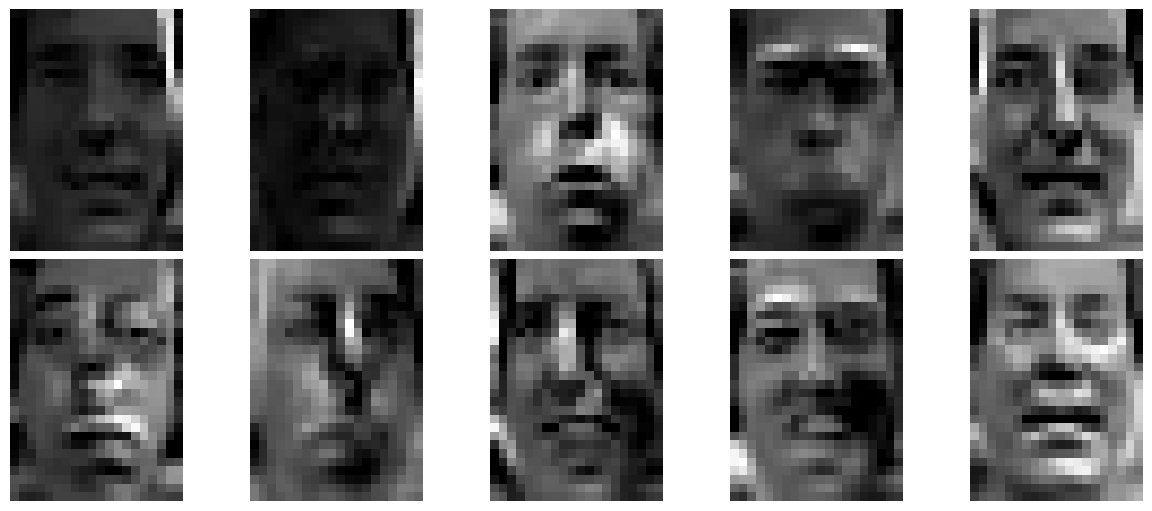

In [10]:
thetas, betas = nmf_model.t_inv_map(nmf_advi.params["mu"])

u = 42
fig, axs = plt.subplots(2, 5, figsize=(12, 5), constrained_layout=True)
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")
    # axs[i].set_title(rf"$\beta_{{{i}}}$")
    
plt.savefig("face_poisson gamma.pdf")

In [ ]:
rank = 10
all_data = loadmat("data/frey_rawface.mat")
data = all_data["ff"].T
nmf_model = old_NMF_Model_PoissonDirExp(data, rank,dir_prior=100, exp_prior=0.1)
nmf_dim = nmf_model.dim
k = jrandom.key(15)
trial_vec = jrandom.normal(k, shape=(nmf_dim,))
theta, beta = nmf_model.t_inv_map(trial_vec)
nmf_advi = mean_field_advi(nmf_model)
nmf_advi.run_advi(k, 10, 5001, 1e-5, print_every=500, adaptive=True)


thetas, betas = nmf_model.t_inv_map(nmf_advi.params["mu"])

u = 42
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")
    # axs[i].set_title(rf"$\beta_{{{i}}}$")

In [ ]:
nmf_advi.run_advi(k, 10, 5001, 1e-5, print_every=500, adaptive=True)


In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")
    # axs[i].set_title(rf"$\beta_{{{i}}}$")

In [ ]:

#Exploring reconstructions 
u = 25
plt.figure()
plt.subplot(121)
plt.imshow((thetas[u] @ betas).reshape(28, 20), cmap="gray")
plt.axis("off")
plt.title(rf"$\theta_{{{u}}}\cdot\beta$")
plt.subplot(122)
plt.imshow((data[u]).reshape(28, 20), cmap="gray")
plt.title(rf"$Y_{{{u}, true}}$")
plt.axis("off")
print(f"theta_{u}: {thetas[u]}")